<a href="https://colab.research.google.com/github/Pireda/Criar_Repositorio_GitHub/blob/main/Nayie-Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

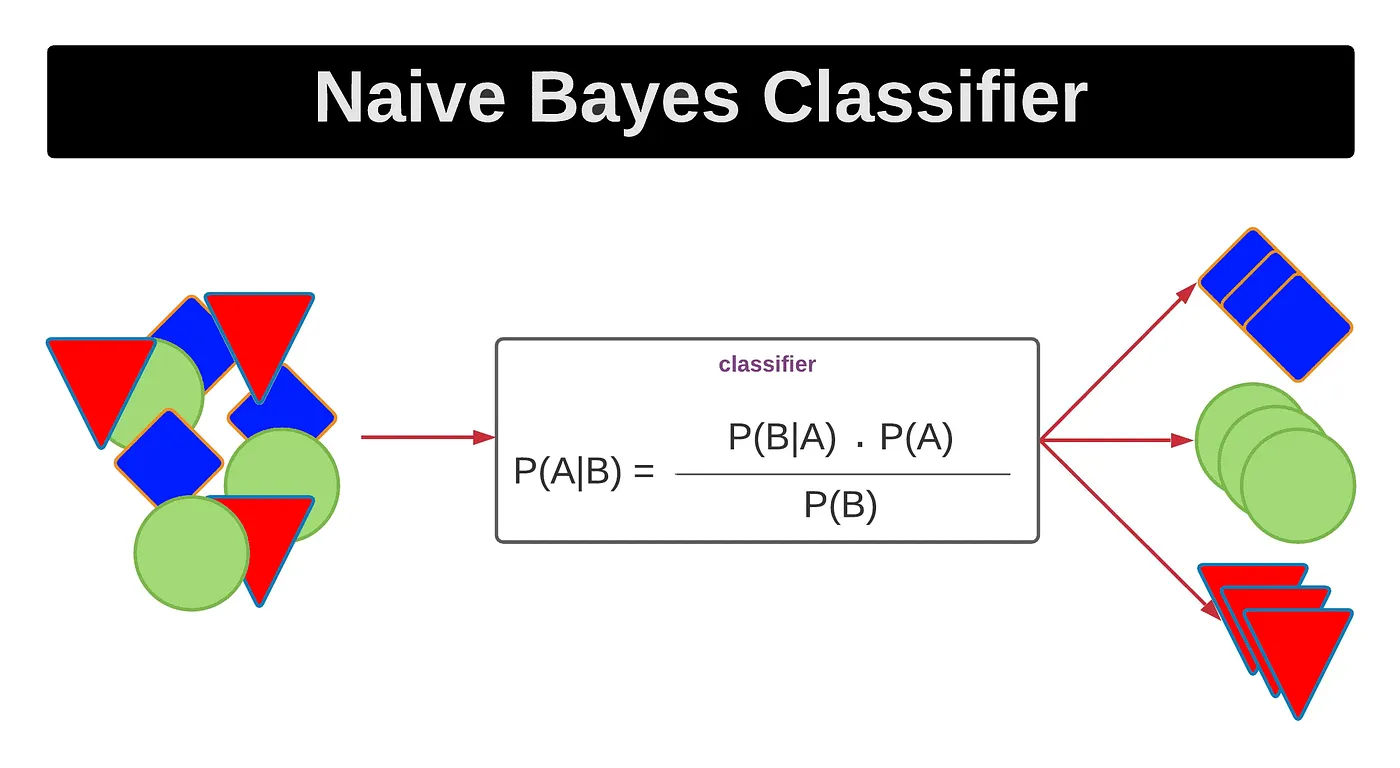








Naive Bayes é um algoritmo que gera uma tabela de probabilidades a partir de uma técnica de classificação de dados. Permitindo fazer o aprendizado de máquina que contempla uma análise com diferentes elementos de forma integrada, e também separadamente

P(B/A) = Significa probabilidade de B acontecer já que o A se confirmou

P(A) = Probabilidade de A acontecer

P(B) = Probabilidade de B acontecer

# **Banco de Dados**

O banco de dados foi retirado so site <https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database>

#**Step by Step**

Passo 1. Importar Biblioreca

Passo 2. Criar Variável

Passo 3. Estática Descritiva (Opcional)

Passo 4. Análise de Distribuição dos Dados (Opcional)

Passo 5. Tratamento de Variáveis Inconsistentes (Quando necessário)

Passo 6. Calcular Média para os Valores Inconsistentes (Quando necessário)

Passo 7. Substituir Valores Inconsistentes pela Média (Quando necessário)

Passo 8. Identificar Valores Faltantes

Passo 9. Dividir Banco de Dados em Variáveis Previsoras e Classe

Passo 10. Escalonamento das Variáveis (Optei pelo método de Padronização)

Passo 11. Divisão do Banco de Dados em Base de Treinamento e Teste

Passo 12. Salvar Base de Dados através da Biblioreca 'pickle'

Passo 13. Treinamento do Algoritmo Nayve-Bayes

Passo 14. Calcular Acurácia do Algoritmo

Passo 15. Construir Matriz de Confusão (Sugiro usar biblioreca 'yellowbrick')

Passo 16.  Gerar Relatório de Classificação do Algoritmo (Recomendável)

Passo 17.  Incluir dados fictícios para testar o Algoritmo (Opcional)

Passo 18. Analisar a eficiencia ou ineficiencia do Algoritmo


# **Importar Bibliotecas**

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

# **Criar Variável**



In [ ]:
base_diabetes = pd.read_csv('/content/diabetes.csv')

# **Visulaizar Variavel**

In [ ]:
print(base_diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## **Conferencia do Banco de Dados**

Verificar se os 10 primeiros registros estão corretos


In [ ]:
base_diabetes.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# **Conferencia do Banco de Dados**

Verificar se os 10 ultimos registros estão corretos

In [ ]:
base_diabetes.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# **Estatística Descritiva dos Dados**

In [ ]:
base_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Análise de Distribuição dos Dados**

Biblioreca -> plotly.express

In [ ]:
grafico_scatter = px.scatter_matrix(base_diabetes, dimensions=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], color='Outcome')
grafico_scatter.show()

# **Tratamento de Valores Inconsistentes**

# Indentificar BMI == 0

In [ ]:
base_diabetes.loc[base_diabetes['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


# Identificar Blood Pressure == 0

In [ ]:
base_diabetes.loc[base_diabetes['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


# **Calcular a Média para BMI exluindo os valores inconsitentes (p.ex. BMI == 0)**

In [ ]:
base_diabetes['BMI'] [base_diabetes['BMI'] > 0]. mean()

32.457463672391015

# Calcular a Média para Blood Pressure exluindo os valores inconsitentes (p.ex. Blood Pressure == 0)

In [ ]:
base_diabetes['BloodPressure'] [base_diabetes[ 'BloodPressure'] > 0]. mean()

72.40518417462484

# Substituir os valores inconsistentes da variável BMI pela média

In [ ]:
base_diabetes.loc[base_diabetes['BMI'] == 0, 'BMI'] = 32.46

# Substituir os valores inconsistentes da variável Blood Pressure pela média

In [ ]:
base_diabetes.loc[base_diabetes['BloodPressure'] == 0, 'BloodPressure'] = 72.41

<ipython-input-16-ba8c3e20fac4>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.41' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



# Confirmar se os valores inconsitentes foram substituidos

In [ ]:
base_diabetes[base_diabetes['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
base_diabetes[base_diabetes['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Identificar valores faltantes

In [ ]:
base_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **Divisão dos Dados em Variávies Previsores e Classe**

# Verificando o Formato da Variável base_diabetes

In [ ]:
type(base_diabetes)

pandas.core.frame.DataFrame

# Criando Variável Previsora -> x_diabetes

Função .values converte para o formato nunmpy

In [ ]:
x_diabetes =  base_diabetes.iloc[:, 0:8].values

# Visualizando a variável x_diabetes

In [ ]:
x_diabetes

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Verificando se a variável está no formato numpy

In [ ]:
type(x_diabetes)

numpy.ndarray

# Criando Variável Classe -> y_diabetes

In [ ]:
y_diabetes = base_diabetes.iloc[:, 8].values

# Visualizando a variável y_diabetes

In [ ]:
y_diabetes

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Verificando se a variável está no formato numpy

In [ ]:
type(y_diabetes)

numpy.ndarray

# **Escalonamento dos Valores por Padronização (Standardisation)

Formula -> x = x - média(x)/sd(x)

*O escalonamento padroniza os valores para uma mesma escala para que os algoritmos baseado em distâncias não deem mais peso aos valores maiores*

# Menores Valores do Banco de Dados

In [ ]:
x_diabetes[:, 0].min(), x_diabetes[:, 1].min(), x_diabetes[:, 2].min(), x_diabetes[:, 3].min(), x_diabetes[:, 4].min(), x_diabetes[:, 5].min(), x_diabetes[:, 6].min(), x_diabetes[:, 7].min()

(0.0, 0.0, 24.0, 0.0, 0.0, 18.2, 0.078, 21.0)

# Maiores Valores do Banco de Dados

In [ ]:
x_diabetes[:, 0].max(), x_diabetes[:, 1].max(), x_diabetes[:, 2].max(), x_diabetes[:, 3].max(), x_diabetes[:, 4].max(), x_diabetes[:, 5].max(), x_diabetes[:, 6].max(), x_diabetes[:, 7].max()

(17.0, 199.0, 122.0, 99.0, 846.0, 67.1, 2.42, 81.0)

# Aplicando a Padronização

* Para isso é necessário importar a biblioteca sklearn ->
    from sklearn.preprocessing import StandardScaler

In [ ]:
# Criar Variável sclaer_diabeter
scaler_diabetes = StandardScaler()

# Aplicando a padronização a variável x_diabetes
x_diabetes = scaler_diabetes.fit_transform(x_diabetes)

# Visualizar a variavel x_credit após a padronização

# Valores Minimos

In [ ]:
x_diabetes[:, 0].min(), x_diabetes[:, 1].min(), x_diabetes[:, 2].min(), x_diabetes[:, 3].min(), x_diabetes[:, 4].min(), x_diabetes[:, 5].min(), x_diabetes[:, 6].min(), x_diabetes[:, 7].min()

(-1.1418515161634994,
 -3.78365371377963,
 -4.004262732327297,
 -1.2882122129452358,
 -0.6928905722954675,
 -2.0751239656771423,
 -1.1895531764897842,
 -1.0415494364835023)

# Valores Máximos

In [ ]:
x_diabetes[:, 0].max(), x_diabetes[:, 1].max(), x_diabetes[:, 2].max(), x_diabetes[:, 3].max(), x_diabetes[:, 4].max(), x_diabetes[:, 5].max(), x_diabetes[:, 6].max(), x_diabetes[:, 7].max()

(3.906578350084603,
 2.4444782063079162,
 4.1026368741560795,
 4.921865835155968,
 6.65283937836846,
 5.042081850322312,
 5.88356476587794,
 4.063715751598595)

# **Divisão do Banco de Dados em Base de Treinamento e Teste**

*Para isso é necessário importar a função train_test_split da biblioteca sklearn.model_selection*

# Divisão dos atributos previsores (x_diabetes) e Classe (y_diabetes) em Base de Treinamento e Teste

*test_size = 0.25 = tamanho da base de dados teste = 25% do Banco de Dados*

*random_state = mantem sempre os mesmos registros na base de treinamento e teste *



In [ ]:
x_diabetes_treinamento, x_diabetes_teste, y_diabetes_treinamento, y_diabetes_test = train_test_split(x_diabetes, y_diabetes, test_size = 0.25, random_state = 0)

Visualizar Base de Treinamento para os Atributos Previsores

In [ ]:
x_diabetes_treinamento.shape, x_diabetes_teste.shape, y_diabetes_treinamento.shape, y_diabetes_test.shape

((576, 8), (192, 8), (576,), (192,))

# **Salvas Base de Dados**

*Para isso é preciso importar a Bibliteca pickle*

In [ ]:
with open('diabetes.pkl', mode = 'wb') as f:
  pickle.dump([x_diabetes_treinamento,
               y_diabetes_treinamento,
               x_diabetes_teste,
               y_diabetes_test], f)

# **Aplicando Algoritmo Naive Bayes**

*Para isso é necessário importa o pacote Gaussian da biblioreca sklearn.naive_bayes*

# Treinamento do Algoritmo

In [ ]:
naive_diabetes = GaussianNB()
naive_diabetes.fit(x_diabetes_treinamento, y_diabetes_treinamento)

GaussianNB()

# **Testando o  Algoritmo - Respotas Previstas**

In [ ]:
previsoes_diabetes = naive_diabetes.predict(x_diabetes_teste)
previsoes_diabetes

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

#**Comparar com as Respostas Reais na Base de Dados**

In [ ]:
y_diabetes_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

#**Calcular a Acurácia do Algoritmo**

*Para isso é necessário importar da biblioteca sklearn e do pacote metrics a função accuracy_score*

In [ ]:
accuracy_score(y_diabetes_test, previsoes_diabetes)  #Acuracia instatisfatoria = 0.76

0.765625

#**Construir Matriz de Confusão**

*Para isso é necessário importar da biblioteca sklearn.metrics a função confusion_matrix*

In [ ]:
confusion_matrix(y_diabetes_test, previsoes_diabetes)

array([[113,  17],
       [ 28,  34]])

#**Construir Matriz de Confusão usando a biblioreca yellowbrick**

*Para isso é necessário importar da biblioteca yellowbrick.classifier a função ConfusionMatrix*

0.765625

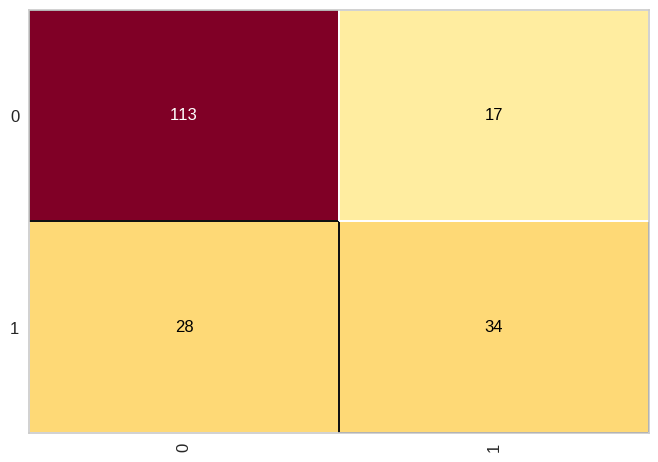

In [ ]:
cm_diabetes = ConfusionMatrix(naive_diabetes)
cm_diabetes.fit(x_diabetes_treinamento, y_diabetes_treinamento)
cm_diabetes.score(x_diabetes_teste, y_diabetes_test)

#**Gerar Relatório de Classificação do Algoritmo**

*Para isso é necessário importar da biblioreca sklearn.metrica a função classification_report*


OBS IMPORTANTE.


precision -> capacdade do algoritmo de identificar as variaveis corretamente

recall -> capacidade do algoritmo de reconhecer as variaveis


In [ ]:
print(classification_report(y_diabetes_test, previsoes_diabetes))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.67      0.55      0.60        62

    accuracy                           0.77       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



#**Adicionando dados de um Paciênte Fictício**



In [ ]:
paciente1 = naive_diabetes.predict([[4,92,66,14,0,36.4,0.342,37]])
resultado_map = {0: 'Não Diabético', 1: 'Diabético'}
print(resultado_map[paciente1[0]])

Diabético


# **Conclusões**

## O algoritmo apresentou baixa acurária (0.77 ou 77%), isso se deve ao fato do algoritmo apresentar baixa precision (0.67) e recall (0.55) no reconhecimento de pacientes com diabetes (1). Para pacientes sem diabetes os valores de precision (0.80) e recall (0.87) foram superiores, mas abaixo de um percentual satisfatório.

# A partir desse resultado é possível afirmar que o algoritmo Nayve-Bayes não é o mais adequado para esse banco de dados.